In [25]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

In [26]:
df_budding = pd.read_csv("./data/2조출아율.csv", index_col = 0)
df_germination = pd.read_csv("./data/2조발아율.csv", index_col = 0)

In [27]:
df_budding.head()    

,4/29,4/30,5/1,5/2,5/3,5/4,5/5,5/6,5/7,5/8,5/9,5/10,5/11,5/12
,,,,,,,,,,,,,,
방풍,0,0,0,0,0,0,0,1,1,1,1,1,1,1
백수오,0,0,0,0,0,7,8,23,27,27,27,29,29,29
상추,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df_germination.head()

,4/29,4/30,5/1,5/2,5/3,5/4,5/5,5/6,5/7,5/8,5/9,5/10,5/11,5/12
,,,,,,,,,,,,,,
(광) 방풍1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
(광) 방풍2,0,0,0,0,0,0,0,0,0,0,0,1,1,1
(광) 방풍3,0,0,0,0,0,0,0,0,0,1,1,2,2,2
(광) 백수오1,0,3,4,4,5,5,5,6,6,8,8,9,9,9
(광) 백수오2,0,1,4,7,8,10,10,10,10,10,10,10,10,10


In [29]:
def day_to_emerge(df, sowing_date_str = "4/28"):

    def _new_emergence(df):
        df_return = df.copy()
        df_return.iloc[:,1:] = df.iloc[:,1:].values - df.iloc[:,:-1].values
        return df_return   
    
    df = _new_emergence(df)

    dates = pd.to_datetime(df.columns, format="%m/%d")
    sowing_date = pd.to_datetime(sowing_date_str, format="%m/%d")
    
    elapsed_days = (dates - sowing_date).days
    df.columns = elapsed_days 
    all_days = sorted(df.columns.unique())
    new_df = pd.DataFrame(0, index=df.index, columns=all_days)

    for day in all_days:
        new_df[day] = df.get(day, 0)

    return new_df

In [30]:
day_to_bud = day_to_emerge(df_budding)
day_to_germinate = day_to_emerge(df_germination)

In [31]:
day_to_bud.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
,,,,,,,,,,,,,,
방풍,0,0,0,0,0,0,0,1,0,0,0,0,0,0
백수오,0,0,0,0,0,7,1,15,4,0,0,2,0,0
상추,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
day_to_germinate.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
,,,,,,,,,,,,,,
(광) 방풍1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
(광) 방풍2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
(광) 방풍3,0,0,0,0,0,0,0,0,0,1,0,1,0,0
(광) 백수오1,0,3,1,0,1,0,0,1,0,2,0,1,0,0
(광) 백수오2,0,1,3,3,1,2,0,0,0,0,0,0,0,0


In [33]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

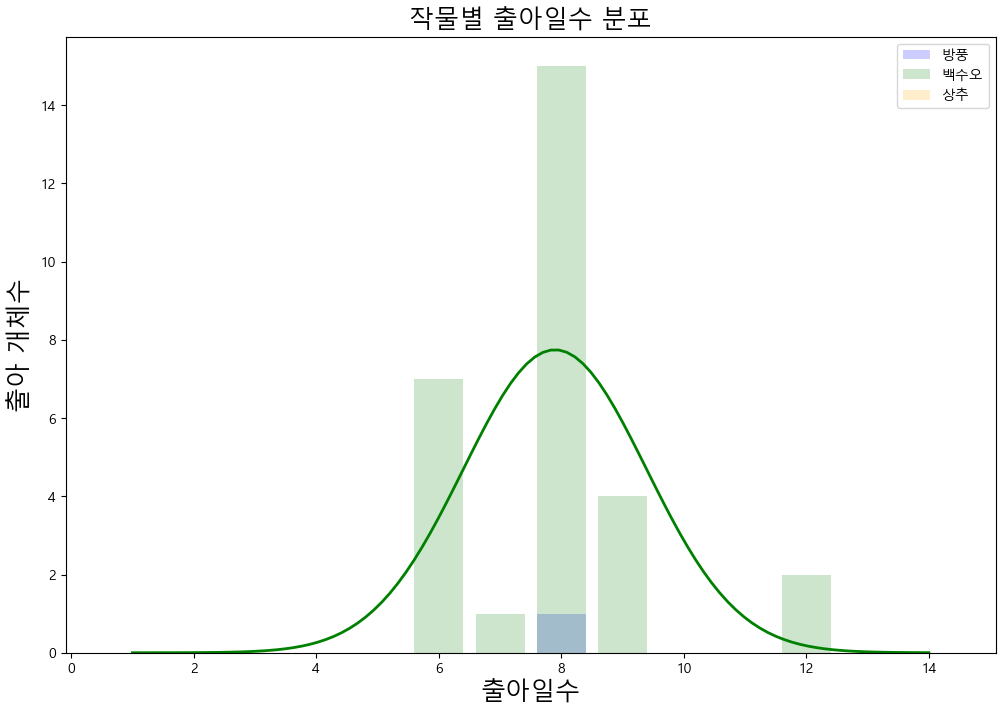

In [34]:
plt.figure(figsize=(12,8))
palette = ['blue','green','orange']
cnt = 0 
for species in day_to_bud.index:
    color = palette[cnt]
    row = day_to_bud.loc[species,:]
    plt.bar(day_to_bud.columns, day_to_bud.loc[species,:],label=species,
            alpha=0.2, color = color)
    cnt += 1

    x = row.index.astype(int)
    y = row.values

    # Gaussian fitting for each repeatition.
    samples = []
    for day, count in zip(x, y):
        samples.extend([day] * int(count))

    # filter: fit only if n_samples > 2 & at least one sample has emerged.
    if len(samples) >= 3 and np.sum(y) > 0:
        mu, std = norm.fit(samples)
        x_fit = np.linspace(min(x), max(x), 100)
        y_fit = norm.pdf(x_fit, mu, std) * np.sum(y) * (x[1] - x[0]) 
        plt.plot(x_fit, y_fit, linewidth=2,color = color)
    
plt.title("작물별 출아일수 분포",fontsize = 18)
plt.xlabel("출아일수",fontsize = 18)
plt.ylabel("출아 개체수",fontsize = 18)
plt.legend()
plt.savefig("./figure/dist_of_day_to_bud")
plt.show()


In [35]:
len(day_to_germinate.index)

18

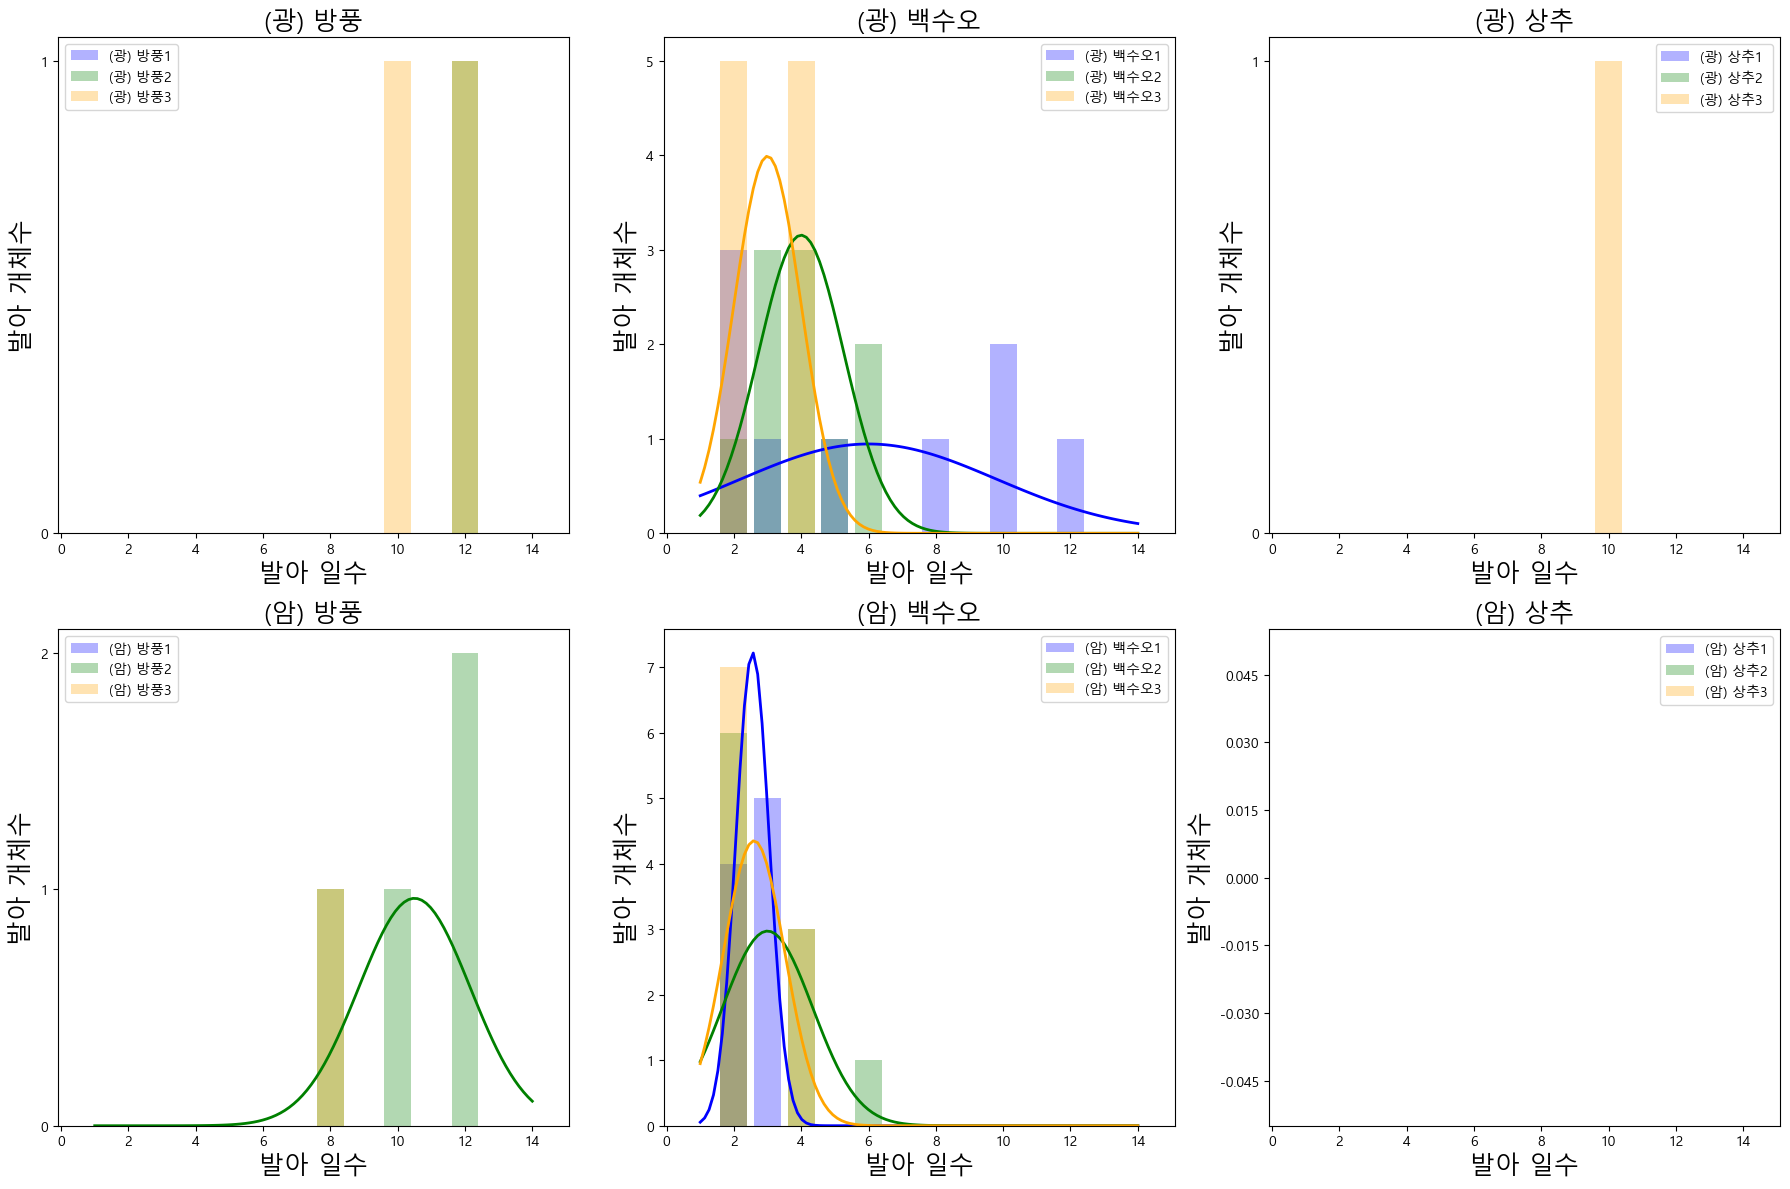

In [36]:
fig, axes = plt.subplots(2,3, figsize = (18, 12))
axes = axes.flatten()

for i in range(6):
    ax = axes[i]
    for j in range(3):
        row_idx = i*3+j
        color = palette[j]

        row = day_to_germinate.iloc[row_idx]
        ax.bar(row.index, row.values,label=day_to_germinate.index[row_idx],
               alpha=0.3, color = color)

        x = row.index.astype(int)
        y = row.values

        # Gaussian fitting for each repeatition.
        samples = []
        for day, count in zip(x, y):
            samples.extend([day] * int(count))

        # filter: fit only if n_samples > 2 & at least one sample has emerged.
        if len(samples) >= 3 and np.sum(y) > 0:
            mu, std = norm.fit(samples)
            x_fit = np.linspace(min(x), max(x), 100)
            y_fit = norm.pdf(x_fit, mu, std) * np.sum(y) * (x[1] - x[0]) 
            ax.plot(x_fit, y_fit, linewidth=2,color = color)

    ax.set_title(f"{day_to_germinate.index[3*i].strip()[:-1]}",fontsize = 18)
    ax.set_xlabel("발아 일수",fontsize = 18)
    ax.set_ylabel("발아 개체수",fontsize = 18)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend()

plt.tight_layout()
plt.savefig("./figure/dist_of_day_to_germ")
plt.show()


In [37]:
def get_meanday(df,exp_type):
    meanday_list = []

    for i in range(len(df)):
        row = df.iloc[i]
        days = row.index.astype(int).to_numpy()
        counts = row.values

        if counts.sum() == 0:
            meanday = float('nan') #no germination or budding
        else:
            meanday = (days * counts).sum() / counts.sum()
        meanday_list.append(meanday)

    return pd.Series(meanday_list, index=df.index, name=f"mean day to {exp_type}")

In [38]:
mean_germination = get_meanday(day_to_germinate,"germination")
mean_budding = get_meanday(day_to_bud, "budding")

In [39]:
print(mean_germination)

  
(광) 방풍1           NaN
(광) 방풍2     12.000000
(광) 방풍3     11.000000
(광) 백수오1     6.000000
(광) 백수오2     4.000000
(광) 백수오3     3.000000
(광) 상추1           NaN
(광) 상추2           NaN
(광) 상추3     10.000000
(암) 방풍1           NaN
(암) 방풍2     10.500000
(암) 방풍3      8.000000
(암) 백수오1     2.555556
(암) 백수오2     3.000000
(암) 백수오3     2.600000
(암) 상추1           NaN
(암) 상추2           NaN
(암) 상추3           NaN
Name: mean day to germination, dtype: float64


In [40]:
print(mean_budding)

  
방풍     8.000000
백수오    7.896552
상추          NaN
Name: mean day to budding, dtype: float64


In [41]:
grouped = mean_germination.groupby(mean_germination.index.str.strip().str[:-1])
mean_germination_by_species = grouped.mean()

In [42]:
print(mean_germination_by_species)

  
(광) 방풍     11.500000
(광) 백수오     4.333333
(광) 상추     10.000000
(암) 방풍      9.250000
(암) 백수오     2.718519
(암) 상추           NaN
Name: mean day to germination, dtype: float64


In [43]:
mean_budding.index

Index(['방풍', '백수오', '상추'], dtype='object', name='  ')

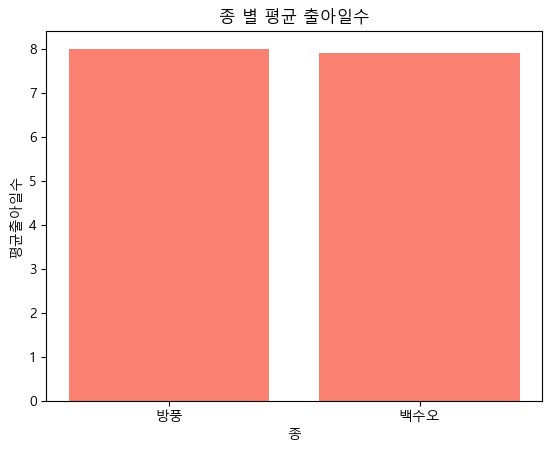

In [44]:
plt.figure()
plt.bar(mean_budding.index, mean_budding, color="salmon")
plt.xlabel("종")
plt.ylabel("평균출아일수")
plt.title("종 별 평균 출아일수")
plt.savefig("./figure/mean_day_to_bud")
plt.show()

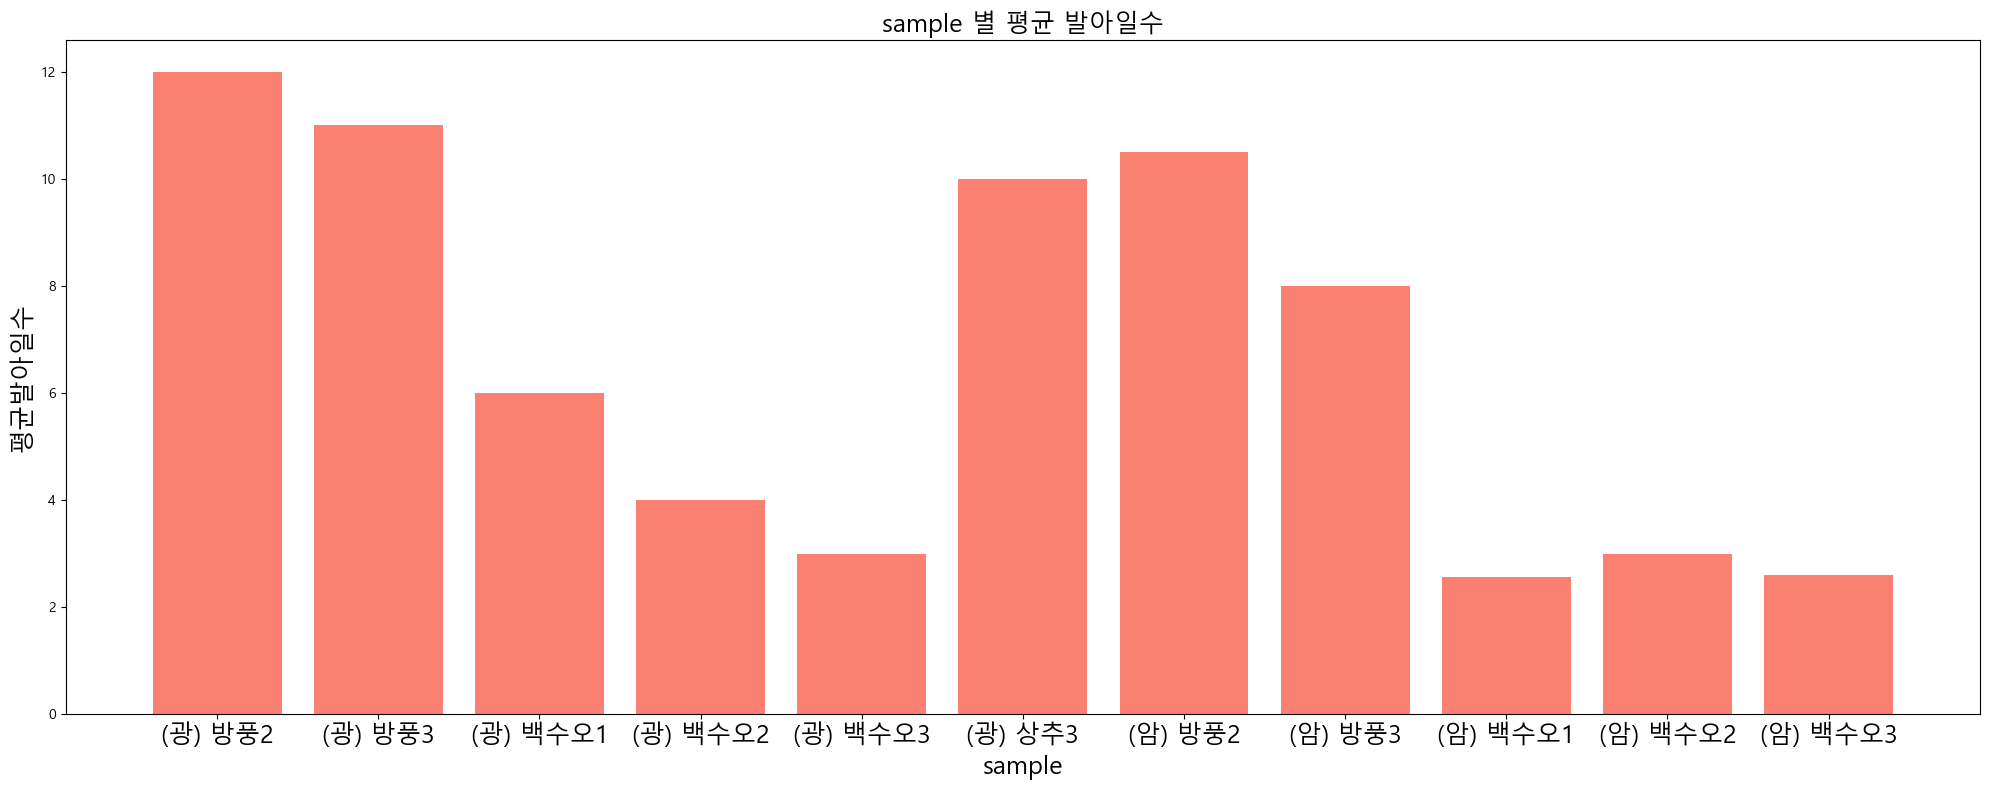

In [45]:
mean_germination_drop = mean_germination.dropna()
plt.figure(figsize=(20,8))
plt.bar(mean_germination_drop.index,mean_germination_drop,color="salmon")
plt.xlabel("sample",fontsize=18)
plt.ylabel("평균발아일수",fontsize=18)
plt.title("sample 별 평균 발아일수",fontsize=18)
plt.xticks(fontsize = 18)
plt.tight_layout()
plt.savefig("./figure/mean_day_to_germ(sample)")
plt.show()

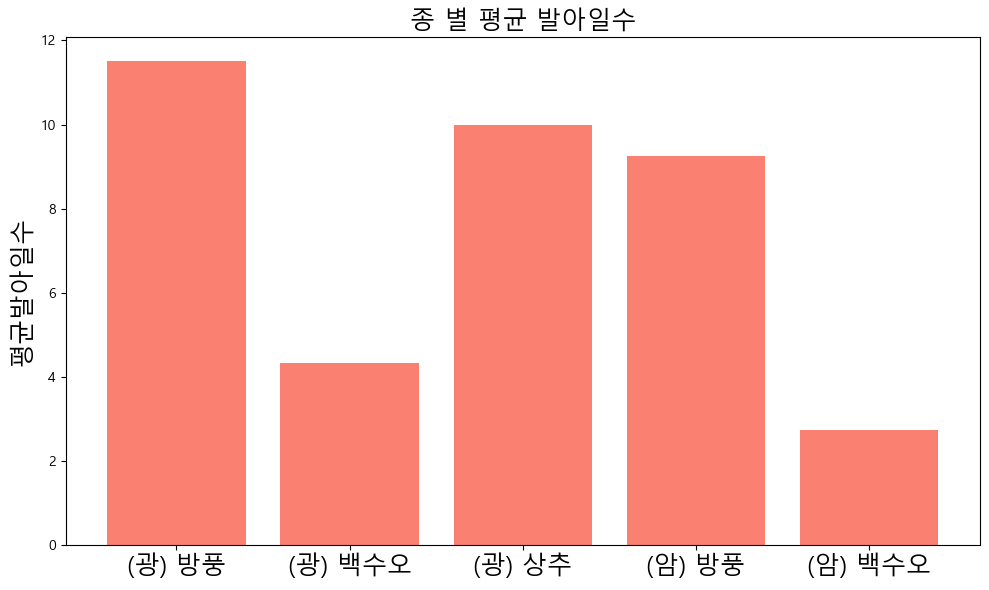

In [46]:
MGSD = mean_germination_by_species.dropna()
plt.figure(figsize=(10,6))
plt.bar(MGSD.index,MGSD,color="salmon")
plt.ylabel("평균발아일수",fontsize=18)
plt.title("종 별 평균 발아일수",fontsize=18)
plt.xticks(fontsize = 18)
plt.tight_layout()
plt.savefig("./figure/mean_day_to_germ(species)")
plt.show()

In [47]:
mean_budding.to_csv("./result/평균출아일수.csv")
mean_germination.to_csv("./result/샘플별_평균발아일수.csv")
mean_germination_by_species.to_csv("./result/종별_평균발아일수.csv")